## 1) Library & Data Import

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#import warnings
#warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/yoonkt200/FastCampusDataset/master/Pokemon.csv")

In [3]:
df.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


#### Feature Description
- Name : 포켓몬 이름
- Type 1 : 포켓몬 타입 1
- Type 2 : 포켓몬 타입 2
- Total : 포켓몬 총 능력치 (Sum of Attack, Sp. Atk, Defense, Sp. Def, Speed and HP)
- HP : 포켓몬 HP 능력치
- Attack : 포켓몬 Attack 능력치
- Defense : 포켓몬 Defense 능력치
- Sp. Atk : 포켓몬 Sp. Atk 능력치
- Sp. Def : 포켓몬 Sp. Def 능력치
- Speed : 포켓몬 Speed 능력치
- Generation : 포켓몬 세대
- Legendary : 전설의 포켓몬 여부

-----

## 2) EDA (Exploratory Data Analysis : 탐색적 데이터 분석)

### 2-1) 기본 정보 탐색

##### 데이터셋 기본 정보 탐색

In [4]:
df.shape

(800, 13)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        800 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      414 non-null    object
 4   Total       800 non-null    int64 
 5   HP          800 non-null    int64 
 6   Attack      800 non-null    int64 
 7   Defense     800 non-null    int64 
 8   Sp. Atk     800 non-null    int64 
 9   Sp. Def     800 non-null    int64 
 10  Speed       800 non-null    int64 
 11  Generation  800 non-null    int64 
 12  Legendary   800 non-null    bool  
dtypes: bool(1), int64(9), object(3)
memory usage: 75.9+ KB


In [6]:
df.isnull().sum()

#               0
Name            0
Type 1          0
Type 2        386
Total           0
HP              0
Attack          0
Defense         0
Sp. Atk         0
Sp. Def         0
Speed           0
Generation      0
Legendary       0
dtype: int64

##### 개별 피처 탐색

In [7]:
df['Legendary'].value_counts()

False    735
True      65
Name: Legendary, dtype: int64

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


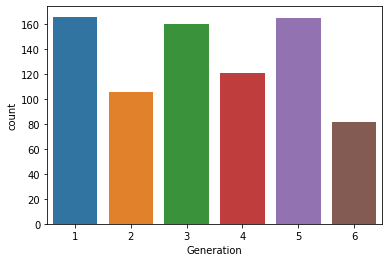

In [8]:
sns.countplot(df['Generation'])

In [9]:
df['Type 1'].unique()

array(['Grass', 'Fire', 'Water', 'Bug', 'Normal', 'Poison', 'Electric',
       'Ground', 'Fairy', 'Fighting', 'Psychic', 'Rock', 'Ghost', 'Ice',
       'Dragon', 'Dark', 'Steel', 'Flying'], dtype=object)

In [10]:
df['Type 2'].unique()

array(['Poison', nan, 'Flying', 'Dragon', 'Ground', 'Fairy', 'Grass',
       'Fighting', 'Psychic', 'Steel', 'Ice', 'Rock', 'Dark', 'Water',
       'Electric', 'Fire', 'Ghost', 'Bug', 'Normal'], dtype=object)

-----

### 2-2) 데이터 특징 탐색

##### 변수들의 분포 탐색

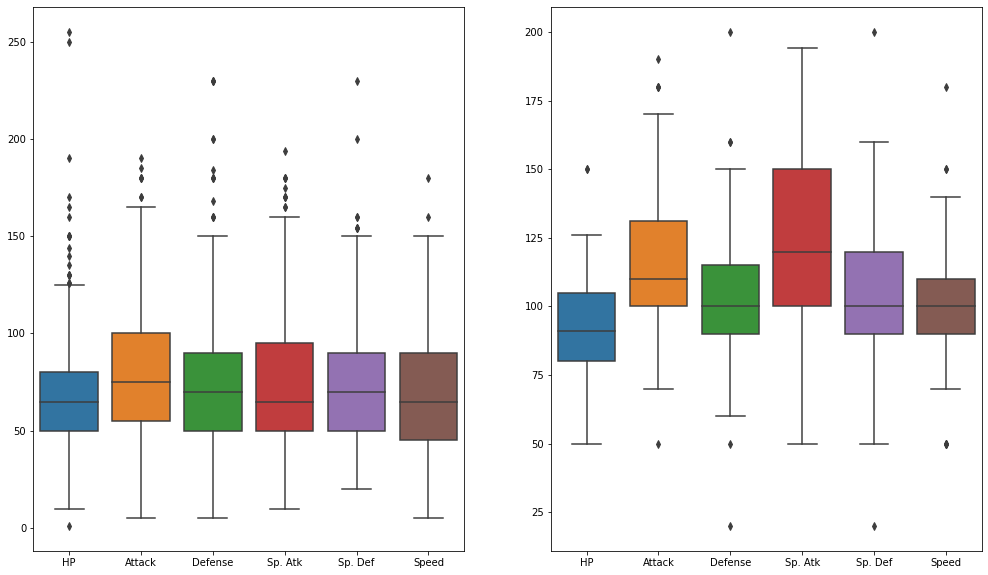

In [11]:
plt.figure(figsize=(17, 10))

plt.subplot(121)
sns.boxplot(data = df[['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']])
#df[]안에 여러개의 컬럼명을 넣을 경우, []로 두번 묶음  ex. df[['Attack', 'Defense', 'Speed']]

plt.subplot(122)
sns.boxplot(data = df[df['Legendary'] == 1][['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']])

Text(0, 0.5, 'sum')

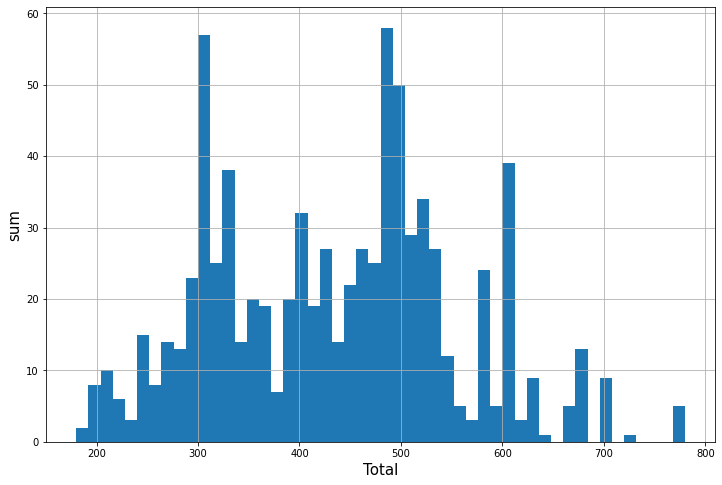

In [12]:
plt.figure(figsize=(12, 8))
df['Total'].hist(bins=50)
plt.xlabel('Total', fontsize=15)
plt.ylabel('sum', fontsize=15)

#"Legendary" == 1 인경우에 total이 큰 경향을 보임 (=이 그래프 우측에 위치할 확률 높음)

##### Legendary 그룹별 탐색

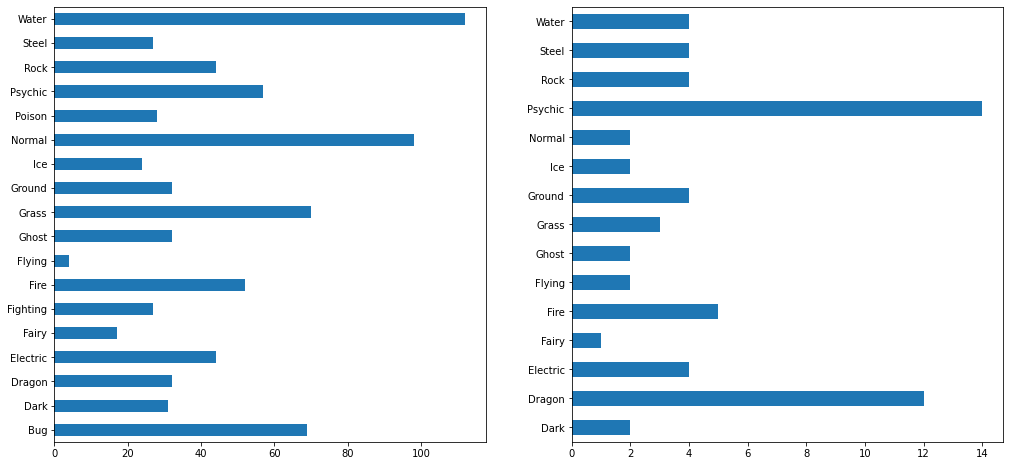

In [13]:
plt.figure(figsize=(17, 8))

plt.subplot(121)
df['Type 1'].value_counts().sort_index().plot.barh()

plt.subplot(122)
df[df['Legendary'] == 1]['Type 1'].value_counts().sort_index().plot.barh()

#"Legendary" == 1 인경우 'Psychic', 'Dragon' 에 많이 분포

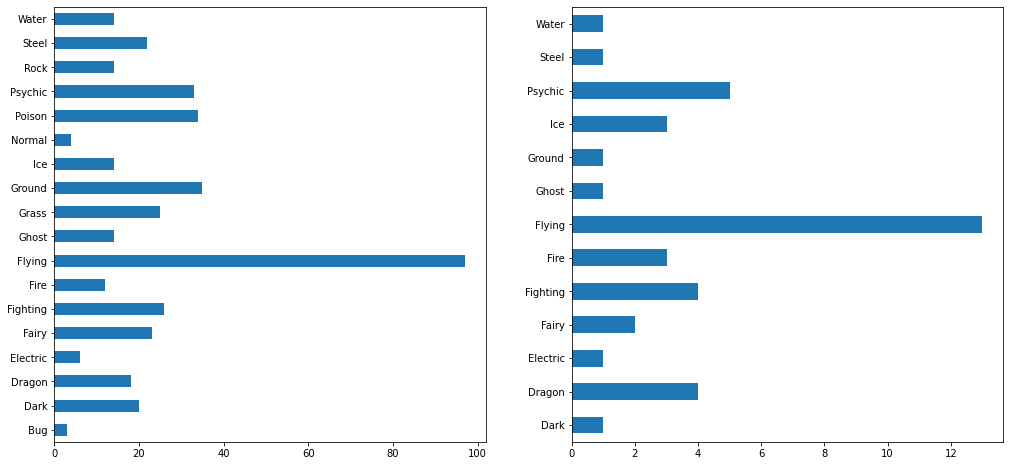

In [14]:
plt.figure(figsize=(17, 8))

plt.subplot(121)
df['Type 2'].value_counts().sort_index().plot.barh()

plt.subplot(122)
df[df['Legendary'] == 1]['Type 2'].value_counts().sort_index().plot.barh()

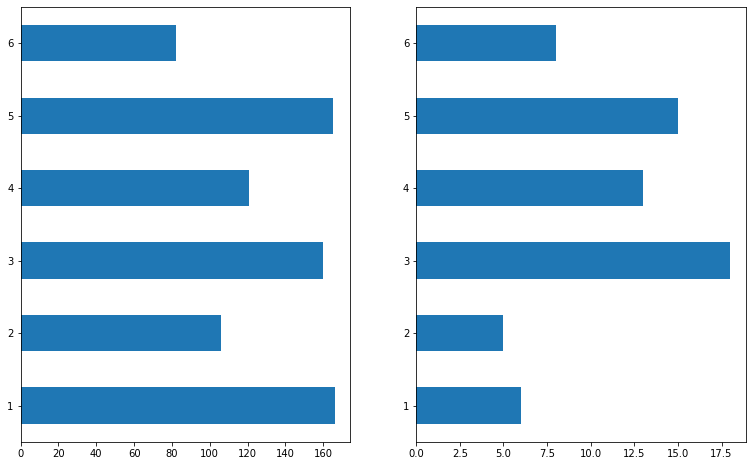

In [15]:
plt.figure(figsize=(13, 8))

plt.subplot(121)
df['Generation'].value_counts().sort_index().plot.barh()

plt.subplot(122)
df[df['Legendary'] == 1]['Generation'].value_counts().sort_index().plot.barh()

#"Legendary" == 1 인경우에 1세대, 2세대에 적게 분포

##### 포켓몬 능력 분포 탐색

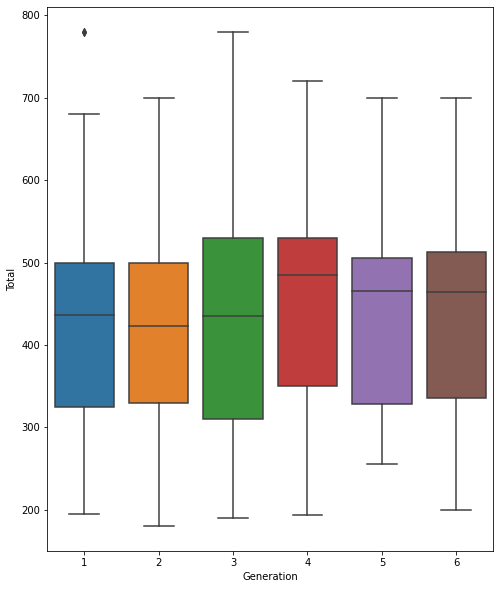

In [16]:
plt.figure(figsize=(8, 10))
sns.boxplot(x= df['Generation'], y = df['Total'])

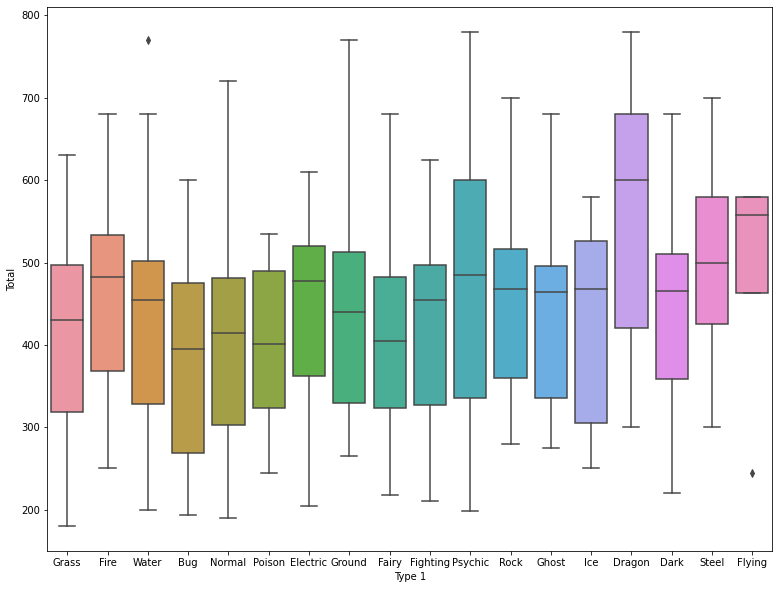

In [17]:
plt.figure(figsize=(13, 10))
sns.boxplot(x= df['Type 1'], y = df['Total'])

-----

## 3) 지도 학습 기반 분류 분석

### 3-1) 데이터 전처리

##### 데이터 타입 변경

In [18]:
df['Legendary'] = df['Legendary'].astype(int)
df['Generation'] = df['Generation'].astype(str)

##### one-hot encoding

In [19]:
new_df = df.loc[:, 'Type 1':'Legendary']

In [20]:
new_df

,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,Grass,Poison,318,45,49,49,65,65,45,1,0
1,Grass,Poison,405,60,62,63,80,80,60,1,0
2,Grass,Poison,525,80,82,83,100,100,80,1,0
3,Grass,Poison,625,80,100,123,122,120,80,1,0
4,Fire,NaN,309,39,52,43,60,50,65,1,0
...,...,...,...,...,...,...,...,...,...,...,...
795,Rock,Fairy,600,50,100,150,100,150,50,6,1
796,Rock,Fairy,700,50,160,110,160,110,110,6,1
797,Psychic,Ghost,600,80,110,60,150,130,70,6,1
798,Psychic,Dark,680,80,160,60,170,130,80,6,1


In [21]:
def make_list(x, y):
    a = []
    a.append(x)
    if y is not np.nan:
        a.append(y)
    return a

In [22]:
new_df['Type'] = new_df.apply(lambda x : make_list(x['Type 1'], x['Type 2']), axis=1)
new_df
#apply함수와 lambda함수의 연결 : DataFrame명['new컬럼명'] = DataFrame명.apply(lambda x : x['칼럼명']들의 조건식, axis = 1)
new_df = new_df.drop(['Type 1', 'Type 2'], axis= 1)  # 이외에도 del df['column']  /   df.drop(df.columns[[0, column index]], axis=1)

In [23]:
from sklearn.preprocessing import MultiLabelBinarizer

In [24]:
new_df

,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Type
0,318,45,49,49,65,65,45,1,0,"[Grass, Poison]"
1,405,60,62,63,80,80,60,1,0,"[Grass, Poison]"
2,525,80,82,83,100,100,80,1,0,"[Grass, Poison]"
3,625,80,100,123,122,120,80,1,0,"[Grass, Poison]"
4,309,39,52,43,60,50,65,1,0,[Fire]
...,...,...,...,...,...,...,...,...,...,...
795,600,50,100,150,100,150,50,6,1,"[Rock, Fairy]"
796,700,50,160,110,160,110,110,6,1,"[Rock, Fairy]"
797,600,80,110,60,150,130,70,6,1,"[Psychic, Ghost]"
798,680,80,160,60,170,130,80,6,1,"[Psychic, Dark]"


In [25]:
mlb = MultiLabelBinarizer()
new_df = new_df.join(pd.DataFrame(mlb.fit_transform(new_df.pop('Type')), columns=mlb.classes_))
new_df

,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Bug,Dark,Dragon,Electric,Fairy,Fighting,Fire,Flying,Ghost,Grass,Ground,Ice,Normal,Poison,Psychic,Rock,Steel,Water
0,318,45,49,49,65,65,45,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
1,405,60,62,63,80,80,60,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
2,525,80,82,83,100,100,80,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
3,625,80,100,123,122,120,80,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
4,309,39,52,43,60,50,65,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,600,50,100,150,100,150,50,6,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
796,700,50,160,110,160,110,110,6,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
797,600,80,110,60,150,130,70,6,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
798,680,80,160,60,170,130,80,6,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [26]:
#new_df = new_df.join(pd.get_dummies(new_df['Generation'], prefix= 'Generation'))
#del new_df['Generation']

new_df = pd.get_dummies(new_df)   #원핫인코딩이 필요한 피쳐가 'Generation'밖에 남지 않았기 때문에 new_df 전체를 넣어도 됨
new_df

,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary,Bug,Dark,Dragon,Electric,Fairy,Fighting,Fire,Flying,Ghost,Grass,Ground,Ice,Normal,Poison,Psychic,Rock,Steel,Water,Generation_1,Generation_2,Generation_3,Generation_4,Generation_5,Generation_6
0,318,45,49,49,65,65,45,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0
1,405,60,62,63,80,80,60,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0
2,525,80,82,83,100,100,80,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0
3,625,80,100,123,122,120,80,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0
4,309,39,52,43,60,50,65,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,600,50,100,150,100,150,50,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
796,700,50,160,110,160,110,110,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
797,600,80,110,60,150,130,70,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
798,680,80,160,60,170,130,80,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1


##### 피처 표준화

In [27]:
from sklearn.preprocessing import MinMaxScaler

In [28]:
minmax_scaler = MinMaxScaler()
new_df.loc[:, 'Total':'Speed'] = minmax_scaler.fit_transform(new_df.loc[:, 'Total':'Speed'])
new_df

,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary,Bug,Dark,Dragon,Electric,Fairy,Fighting,Fire,Flying,Ghost,Grass,Ground,Ice,Normal,Poison,Psychic,Rock,Steel,Water,Generation_1,Generation_2,Generation_3,Generation_4,Generation_5,Generation_6
0,0.230000,0.173228,0.237838,0.195556,0.298913,0.214286,0.228571,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0
1,0.375000,0.232283,0.308108,0.257778,0.380435,0.285714,0.314286,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0
2,0.575000,0.311024,0.416216,0.346667,0.489130,0.380952,0.428571,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0
3,0.741667,0.311024,0.513514,0.524444,0.608696,0.476190,0.428571,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0
4,0.215000,0.149606,0.254054,0.168889,0.271739,0.142857,0.342857,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,0.700000,0.192913,0.513514,0.644444,0.489130,0.619048,0.257143,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
796,0.866667,0.192913,0.837838,0.466667,0.815217,0.428571,0.600000,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
797,0.700000,0.311024,0.567568,0.244444,0.760870,0.523810,0.371429,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
798,0.833333,0.311024,0.837838,0.244444,0.869565,0.523810,0.428571,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1


##### 데이터셋 분리

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
x_train, x_test, y_train, y_test = train_test_split(new_df.drop('Legendary', axis=1), new_df['Legendary'], test_size = 0.25, random_state= 33)
#new_df.drop('Legendary', axis=1) = new_df.loc[:, new_df.columns != 'Legendary']

In [31]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((600, 31), (200, 31), (600,), (200,))

-----

### 3-2) Logistic Regression 모델 학습

##### 모델 학습

In [32]:
from sklearn.linear_model import LogisticRegression

In [33]:
lr = LogisticRegression(random_state=0)
lr.fit(x_train, y_train)
pred = lr.predict(x_test)

##### 모델 평가

In [34]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
#accuracy = 정확도
#precision = 정밀도(positive로 예측한것중 실제 positive의 비율), recall = 재현율(positive를 얼마나 정확히 예측했는지)
#f1 = 정밀도와 재현율의 조화 평균

In [35]:
print(accuracy_score(y_test, pred))
print(precision_score(y_test, pred))
print(recall_score(y_test, pred))
print(f1_score(y_test, pred))

0.975
1.0
0.5833333333333334
0.7368421052631579


In [36]:
from sklearn.metrics import confusion_matrix

In [37]:
confmat = confusion_matrix(y_true= y_test, y_pred=pred)
confmat

array([[188,   0],
       [  5,   7]])

-----

### 3-3) 클래스 불균형 조정

In [38]:
new_df['Legendary'].value_counts()

0    735
1     65
Name: Legendary, dtype: int64

##### 1:1 샘플링

In [39]:
pos_ran_idx = new_df[new_df['Legendary'] == 1].sample(65, random_state = 33).index.tolist()
neg_ran_idx = new_df[new_df['Legendary'] == 0].sample(65, random_state = 33).index.tolist()

##### 데이터셋 분리

In [40]:
random_index = pos_ran_idx + neg_ran_idx
x_train, x_test, y_train, y_test = train_test_split(new_df.loc[random_index, new_df.columns != 'Legendary'], new_df['Legendary'][random_index]
                                                    , test_size = 0.25, random_state= 33)

In [41]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((97, 31), (33, 31), (97,), (33,))

##### 모델 재학습

In [42]:
lr = LogisticRegression(random_state=0)
lr.fit(x_train, y_train)
pred = lr.predict(x_test)

In [43]:
print(accuracy_score(y_test, pred))
print(precision_score(y_test, pred))
print(recall_score(y_test, pred))
print(f1_score(y_test, pred))

0.8787878787878788
0.75
1.0
0.8571428571428571


In [44]:
confmat = confusion_matrix(y_true= y_test, y_pred=pred)
confmat

array([[17,  4],
       [ 0, 12]])

## 4) 비지도 학습 기반 군집 분류 분석

### 4-1) Kmeans 군집 분류

##### 2차원 군집 분석 (Kmeans)

In [45]:
from sklearn.cluster import KMeans

k: 1  /  cost: 39.94132148240133
k: 2  /  cost: 20.69548489558779
k: 3  /  cost: 15.34003525927866
k: 4  /  cost: 11.455216358221948
k: 5  /  cost: 9.713785106161728


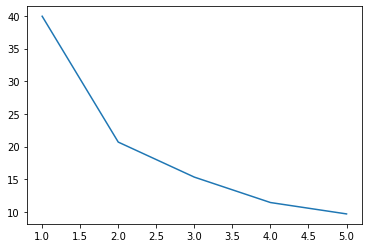

In [46]:
x = new_df[['Attack', 'Defense']]
k_list = []
cost_list = []
for k in range(1, 6):
    kmens = KMeans(n_clusters= k).fit(x)
    inertia = kmens.inertia_
    print('k:', k, ' / ', 'cost:', inertia)
    k_list.append(k)
    cost_list.append(inertia)
plt.plot(k_list, cost_list)

In [50]:
kmens = KMeans(n_clusters= 4).fit(x)
cluster_num = kmens.predict(x)
new_df['cluster_num'] = cluster_num
new_df

,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary,Bug,Dark,Dragon,Electric,Fairy,Fighting,Fire,Flying,Ghost,Grass,Ground,Ice,Normal,Poison,Psychic,Rock,Steel,Water,Generation_1,Generation_2,Generation_3,Generation_4,Generation_5,Generation_6,cluster_num
0,0.230000,0.173228,0.237838,0.195556,0.298913,0.214286,0.228571,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1
1,0.375000,0.232283,0.308108,0.257778,0.380435,0.285714,0.314286,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,3
2,0.575000,0.311024,0.416216,0.346667,0.489130,0.380952,0.428571,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,3
3,0.741667,0.311024,0.513514,0.524444,0.608696,0.476190,0.428571,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
4,0.215000,0.149606,0.254054,0.168889,0.271739,0.142857,0.342857,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,0.700000,0.192913,0.513514,0.644444,0.489130,0.619048,0.257143,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
796,0.866667,0.192913,0.837838,0.466667,0.815217,0.428571,0.600000,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,2
797,0.700000,0.311024,0.567568,0.244444,0.760870,0.523810,0.371429,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,3
798,0.833333,0.311024,0.837838,0.244444,0.869565,0.523810,0.428571,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,2


In [55]:
new_df['cluster_num'].value_counts()

3    314
1    245
2    133
0    108
Name: cluster_num, dtype: int64

##### 군집 시각화

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


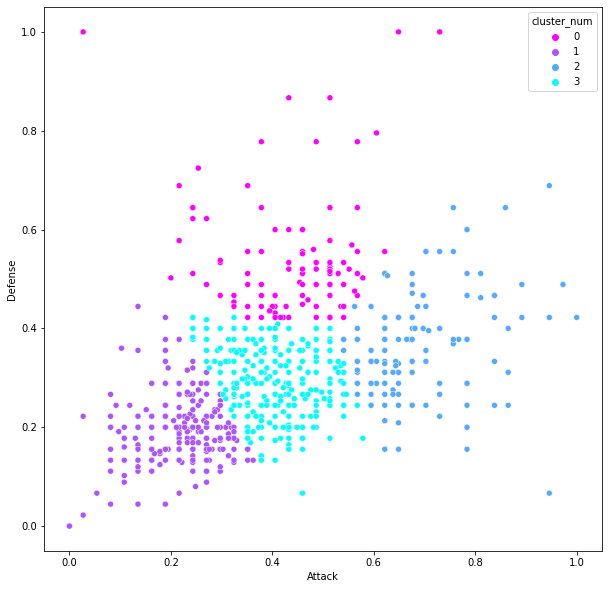

In [65]:
plt.figure(figsize=(10, 10))
sns.scatterplot(new_df['Attack'], new_df['Defense'], hue=new_df['cluster_num'], palette='cool_r')

##### 다차원 군집 분석 (Kmeans)

k: 1  /  cost: 109.35040105115625
k: 2  /  cost: 74.13604818718562
k: 3  /  cost: 63.45403085632634
k: 4  /  cost: 56.04332318126073
k: 5  /  cost: 51.07968669682329
k: 6  /  cost: 47.65954005741632
k: 7  /  cost: 45.03588055933916
k: 8  /  cost: 42.66153199885305
k: 9  /  cost: 40.83003261903664
k: 10  /  cost: 39.2760052606451
k: 11  /  cost: 37.93179704125632
k: 12  /  cost: 36.18744712129334
k: 13  /  cost: 34.988058449854194
k: 14  /  cost: 33.887568259594694


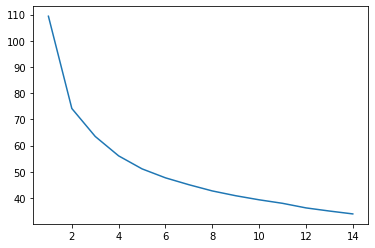

In [66]:
x = new_df[['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']]
k_list = []
cost_list = []
for k in range(1, 15):
    kmens = KMeans(n_clusters= k).fit(x)
    inertia = kmens.inertia_
    print('k:', k, ' / ', 'cost:', inertia)
    k_list.append(k)
    cost_list.append(inertia)
plt.plot(k_list, cost_list)

In [67]:
kmens = KMeans(n_clusters= 5).fit(x)
cluster_num = kmens.predict(x)
new_df['cluster_num'] = cluster_num
new_df

,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary,Bug,Dark,Dragon,Electric,Fairy,Fighting,Fire,Flying,Ghost,Grass,Ground,Ice,Normal,Poison,Psychic,Rock,Steel,Water,Generation_1,Generation_2,Generation_3,Generation_4,Generation_5,Generation_6,cluster_num
0,0.230000,0.173228,0.237838,0.195556,0.298913,0.214286,0.228571,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1
1,0.375000,0.232283,0.308108,0.257778,0.380435,0.285714,0.314286,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,4
2,0.575000,0.311024,0.416216,0.346667,0.489130,0.380952,0.428571,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,4
3,0.741667,0.311024,0.513514,0.524444,0.608696,0.476190,0.428571,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
4,0.215000,0.149606,0.254054,0.168889,0.271739,0.142857,0.342857,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,0.700000,0.192913,0.513514,0.644444,0.489130,0.619048,0.257143,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,4
796,0.866667,0.192913,0.837838,0.466667,0.815217,0.428571,0.600000,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
797,0.700000,0.311024,0.567568,0.244444,0.760870,0.523810,0.371429,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
798,0.833333,0.311024,0.837838,0.244444,0.869565,0.523810,0.428571,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0


##### 군집별 특성 시각화

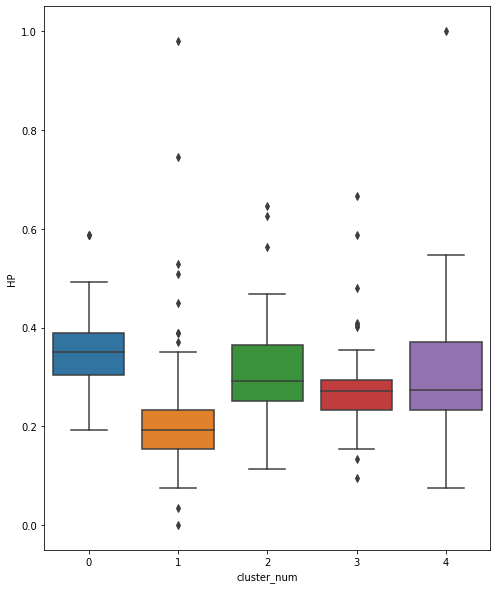

In [69]:
plt.figure(figsize=(8, 10))
sns.boxplot(x = new_df['cluster_num'], y = new_df['HP'])

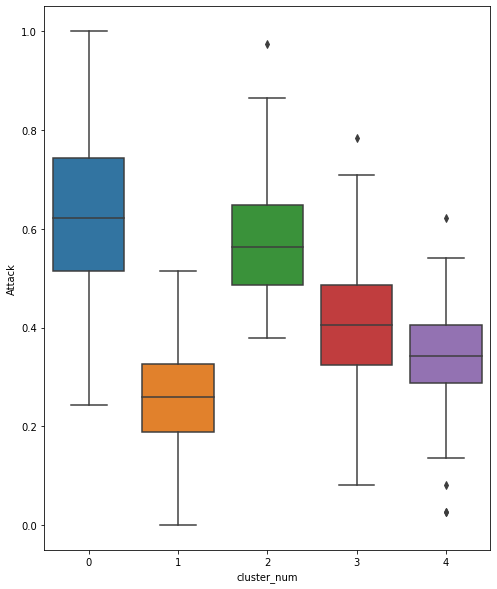

In [70]:
plt.figure(figsize=(8, 10))
sns.boxplot(x = new_df['cluster_num'], y = new_df['Attack'])

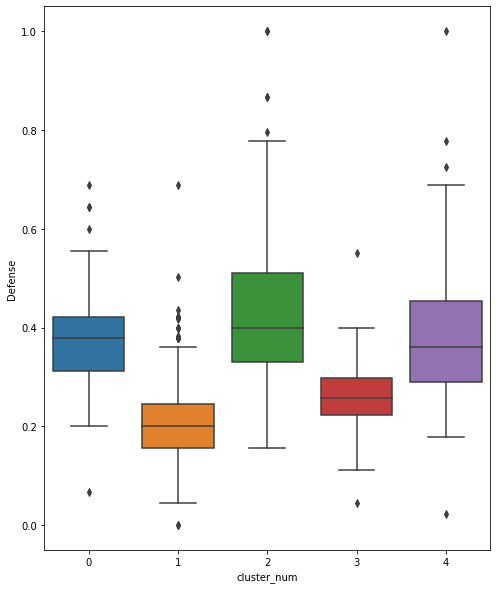

In [75]:
plt.figure(figsize=(8, 10))
sns.boxplot(x = new_df['cluster_num'], y = new_df['Defense'])

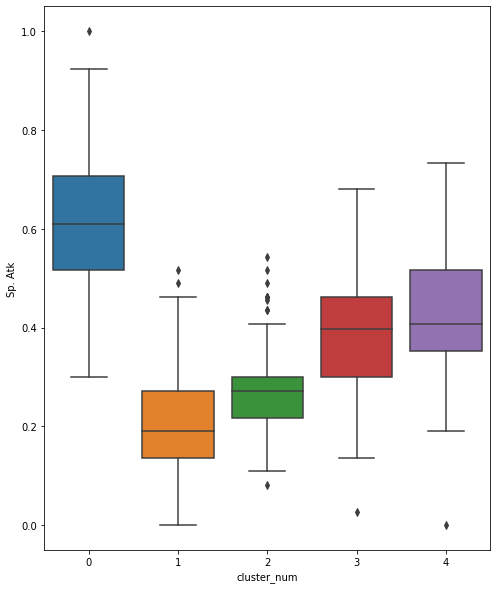

In [72]:
plt.figure(figsize=(8, 10))
sns.boxplot(x = new_df['cluster_num'], y = new_df['Sp. Atk'])

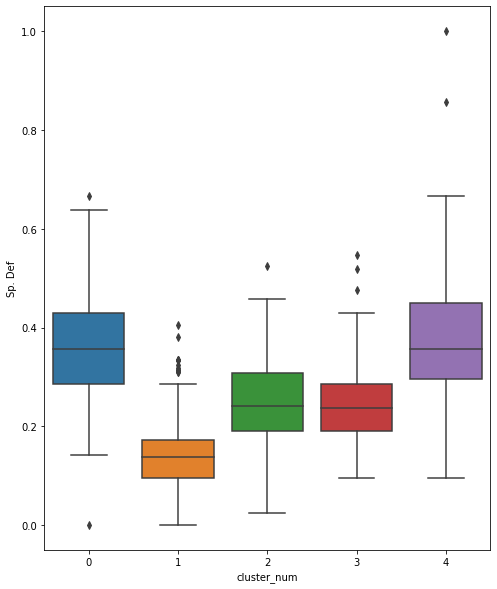

In [74]:
plt.figure(figsize=(8, 10))
sns.boxplot(x = new_df['cluster_num'], y = new_df['Sp. Def'])

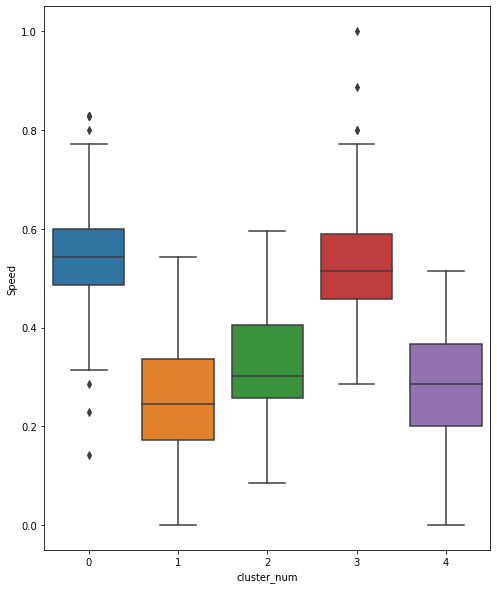

In [76]:
plt.figure(figsize=(8, 10))
sns.boxplot(x = new_df['cluster_num'], y = new_df['Speed'])